## Logistic regression for Rain in Australia:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Here use machine learning to get a model for raining possibility in Australia:
[rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

## Data cleaning



### Import the data

In [ ]:
import pandas as pd
import numpy as np
##### if you are using google colab, please uncomment the next 4 lines:
from google.colab import drive
import os
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/AOS111/weatherAUS.csv')

pd.set_option('display.max_columns', None)

data.sample(5)

Mounted at /content/drive


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
120637,2016-10-06,Perth,12.3,22.4,0.0,2.2,6.6,NW,43.0,NW,NW,13.0,17.0,72.0,63.0,1010.7,1010.5,8.0,6.0,19.4,21.6,No,1.2,Yes
17890,2009-07-22,NorahHead,13.8,24.0,0.0,NaN,NaN,NW,56.0,N,NNW,28.0,31.0,56.0,52.0,1012.0,1006.7,NaN,NaN,20.9,22.2,No,2.6,Yes
41614,2009-08-07,Wollongong,10.7,21.9,0.0,NaN,NaN,WSW,83.0,NNE,S,17.0,13.0,45.0,46.0,1013.9,1010.9,NaN,7.0,16.4,19.3,No,0.0,No
17956,2009-09-27,NorahHead,10.2,18.5,0.0,NaN,NaN,WNW,50.0,W,WNW,22.0,28.0,33.0,26.0,1007.6,1004.1,NaN,NaN,14.2,17.5,No,0.0,No
76989,2012-06-22,Watsonia,7.7,11.4,17.6,0.4,1.0,SW,41.0,SW,WSW,13.0,11.0,100.0,80.0,1005.0,1010.3,7.0,7.0,8.7,9.5,Yes,1.8,Yes


### Data cleaning


In [ ]:
# Getting rid of the columns with objects which will not be used in the following model:
data.drop(
    ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'],
    axis=1,
    inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Replace NAN with mean value
data.fillna(data.mean(), inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


###  Converting Predictions to Binary for Logistic Regression

In [ ]:
# Now change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
25347,17.1,31.3,0.0,5.469824,7.624853,31.0,4.0,11.0,82.0,38.0,1017.653758,1015.258204,4.437189,4.503167,21.9,29.5,0,0
131136,-3.5,9.0,0.0,5.469824,7.624853,17.0,4.0,9.0,95.0,62.0,1032.000000,1028.600000,4.437189,4.503167,-1.1,8.9,0,0
39333,9.2,18.0,0.0,3.400000,5.300000,41.0,30.0,17.0,65.0,57.0,1014.400000,1015.000000,2.000000,6.000000,12.1,16.6,0,1


### Getting training data and test data

In [ ]:
# excluide data of 'RainTomorrow' as target data
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0


In [ ]:
# Normalize the data, scale to 0 ~ 1
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=75)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(113754, 17)
(113754,)
(28439, 17)
(28439,)


## Model training with sklearn



### Fit the model

Apply logistic regression on the training dataset and check the accuracy of model on the test dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train, y_train)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr_score(x_test, y_test)))

Test accuracy of sklearn logistic regression library: 0.8411336544885545


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Confusion matrix

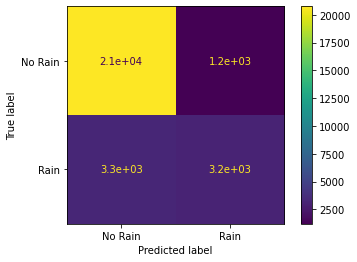

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = lr.predict(x_test)
#print(y_pred)
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels=["No Rain","Rain"]).plot(values_format=".2g")
#Other way around
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
#disp = disp.plot(include_values=True, cmap='viridis', ax=None, values_format=".2g",xticks_rotation='horizontal')
precision=cm[1,1]/(cm[1,1]+cm[0,1])
recall=cm[1,1]/(cm[1,1]+cm[1,0])
print("precision= %.2f;" % precision, "recall = %.2f" % recall)

### ROC curve

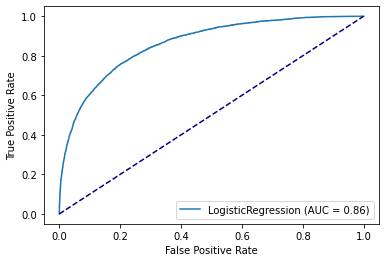

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,x_test,y_test)
plt.plot([0,1],[0,1],linestyle='--',color='b')